In [1]:
import yfinance as yf
import pandas as pd

In [2]:
stocks = pd.read_csv('nasdaqlisted.txt', delimiter='|')[:-1]

In [3]:
stocks = stocks.loc[stocks['Test Issue'] == 'N']

In [4]:
stocks.groupby('Market Category')['Symbol'].count()

Market Category
G     921
Q    1560
S    1098
Name: Symbol, dtype: int64

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [353]:
ticker = yf.Ticker('GBPJPY=X')

data = ticker.history(period='7d', interval='1m')
cols = ['Open','High', 'Low', 'Close']

In [354]:
data = data[cols]

In [355]:
forecast = data['Close'].shift()

In [356]:
forecast = forecast.dropna().values

In [357]:
data = data.iloc[:-15]

(array([  1.,   1.,   3.,   7.,   7.,   8.,  12.,  20.,  44.,  42.,  66.,
         82., 108., 148., 218., 281., 382., 563., 657., 807., 876., 907.,
        831., 684., 471., 384., 278., 233., 159., 126.,  79.,  56.,  33.,
         21.,  24.,  16.,   5.,   4.,   2.,   8.,   4.,   5.,   3.,   3.,
          0.,   1.,   0.,   1.,   0.,   1.]),
 array([-0.23283657, -0.22176844, -0.21070032, -0.19963219, -0.18856407,
        -0.17749595, -0.16642782, -0.1553597 , -0.14429157, -0.13322345,
        -0.12215533, -0.1110872 , -0.10001908, -0.08895095, -0.07788283,
        -0.0668147 , -0.05574658, -0.04467846, -0.03361033, -0.02254221,
        -0.01147408, -0.00040596,  0.01066216,  0.02173029,  0.03279841,
         0.04386654,  0.05493466,  0.06600278,  0.07707091,  0.08813903,
         0.09920716,  0.11027528,  0.12134341,  0.13241153,  0.14347965,
         0.15454778,  0.1656159 ,  0.17668403,  0.18775215,  0.19882027,
         0.2098884 ,  0.22095652,  0.23202465,  0.24309277,  0.25416089,
 

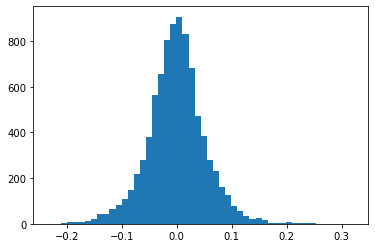

In [358]:
plt.hist(forecast, bins=50)

In [359]:
labels = []
for f in forecast:
    
    if f < -np.std(forecast):
        labels.append([1,0,0])
    elif f > np.std(forecast):
        labels.append([0,0,1])
    else:
        labels.append([0,1,0])

In [360]:
import random

def MinMax(x):
    return (x-min(x))/(max(x)-min(x))

def ztransform(x):
    return (x-np.mean(x))/np.std(x)

def createSample(data, length, samples):
    x = []
    y = []
    x_test = []
    y_test = []
    for i in range(samples):
        start_idx = random.randint(0, (len(data)-length)-1)
        df = data.iloc[start_idx:start_idx+length+1].apply(MinMax, axis=0)
        if random.random() < 0.7:
            y.append(labels[start_idx+length-1])
            x.append(df.iloc[:-1].values)
        else:
            y_test.append(labels[start_idx+length-1])
            x_test.append(df.iloc[:-1].values)

    return np.array(x), np.array(y), np.array(x_test), np.array(y_test)
    

In [361]:
X,Y, X_test, Y_test = createSample(data, 50, 10000)

In [362]:
X

array([[[0.72043011, 0.58974359, 0.76470588, 0.73271889],
        [0.64516129, 0.62820513, 0.70588235, 0.77880184],
        [0.73655914, 0.61538462, 0.76470588, 0.77419355],
        ...,
        [0.2688172 , 0.07051282, 0.23529412, 0.23041475],
        [0.2688172 , 0.04487179, 0.14117647, 0.29953917],
        [0.18817204, 0.        , 0.23529412, 0.32258065]],

       [[0.81560284, 0.848     , 0.86956522, 0.8630137 ],
        [0.81560284, 0.952     , 0.95652174, 1.        ],
        [1.        , 1.        , 1.        , 0.95205479],
        ...,
        [0.45390071, 0.416     , 0.43478261, 0.5       ],
        [0.44680851, 0.384     , 0.34782609, 0.43150685],
        [0.14184397, 0.304     , 0.26086957, 0.43150685]],

       [[0.2967033 , 0.1942446 , 0.14189189, 0.        ],
        [0.24725275, 0.05035971, 0.12162162, 0.1625    ],
        [0.25824176, 0.07913669, 0.05405405, 0.03125   ],
        ...,
        [0.90659341, 0.92805755, 0.92567568, 0.8375    ],
        [0.87362637, 0.949640

In [363]:
Y.shape

(7027, 3)

In [364]:
Y

array([[0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       ...,
       [0, 0, 1],
       [0, 0, 1],
       [0, 1, 0]])

In [365]:
X.shape

(7027, 50, 4)

Epoch 1/50
703/703 [==============================] - 3s 4ms/step - loss: 0.7878 - val_loss: 0.7739
Epoch 2/50
703/703 [==============================] - 3s 4ms/step - loss: 0.7676 - val_loss: 0.7621
Epoch 3/50
703/703 [==============================] - 3s 4ms/step - loss: 0.7596 - val_loss: 0.7474
Epoch 4/50
703/703 [==============================] - 3s 4ms/step - loss: 0.7512 - val_loss: 0.7476
Epoch 5/50
703/703 [==============================] - 3s 4ms/step - loss: 0.7401 - val_loss: 0.7343
Epoch 6/50
703/703 [==============================] - 3s 4ms/step - loss: 0.7278 - val_loss: 0.7199
Epoch 7/50
703/703 [==============================] - 3s 4ms/step - loss: 0.7122 - val_loss: 0.7020
Epoch 8/50
703/703 [==============================] - 3s 4ms/step - loss: 0.6942 - val_loss: 0.6844
Epoch 9/50
703/703 [==============================] - 3s 4ms/step - loss: 0.6722 - val_loss: 0.6744
Epoch 10/50
703/703 [==============================] - 3s 4ms/step - loss: 0.6492 - val_loss: 0.6465

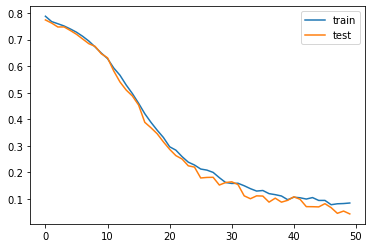

In [366]:
## from keras.models import Sequential, Model
from keras.layers import Dense, RepeatVector,TimeDistributed, Input, Concatenate
from keras.layers import LSTM, concatenate, Conv1D, Dropout, MaxPooling1D,Flatten
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# design network
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=10, activation='relu', input_shape=(X.shape[1], X.shape[2])))
model.add(Conv1D(filters=64, kernel_size=10, activation='relu'))
model.add(Dropout(0.3))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam')
# fit network
history = model.fit(X, Y, epochs=50, batch_size=10, validation_data=(X, Y), shuffle=False)
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [367]:
len(labels)

8672

In [368]:
from sklearn.metrics import confusion_matrix, classification_report
actual= np.argmax(Y, axis=1)
predicted = np.argmax(model.predict(X), axis=1)
print(classification_report(actual, predicted))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97       960
           1       0.99      1.00      0.99      5143
           2       0.98      0.97      0.97       924

    accuracy                           0.99      7027
   macro avg       0.99      0.97      0.98      7027
weighted avg       0.99      0.99      0.99      7027



In [373]:
ticker = yf.Ticker('GBPJPY=X')

data_test = ticker.history(period='6h', interval='1m')
cols = ['Open','High', 'Low', 'Close']
data_test = data_test[cols]

In [374]:
from tqdm import tqdm
result = pd.DataFrame(index=data_test.index)

for i in tqdm(range(0,len(data_test)-1)):
    if i > 50:
        try:
            sbs = data_test.iloc[i:i+50]
            pred = model.predict(sbs.apply(MinMax, axis=0).values.reshape(1,50,4))
            result.loc[sbs.index[-1], 'Price'] = sbs['Close'][-1]
            result.loc[sbs.index[-1], 'Indicator'] = np.argmax(pred)
            result.loc[sbs.index[-1], 'Strength'] = np.max(pred)
        except:
            pass
        

results = data_test.join(result)

100%|██████████| 299/299 [00:06<00:00, 44.10it/s]


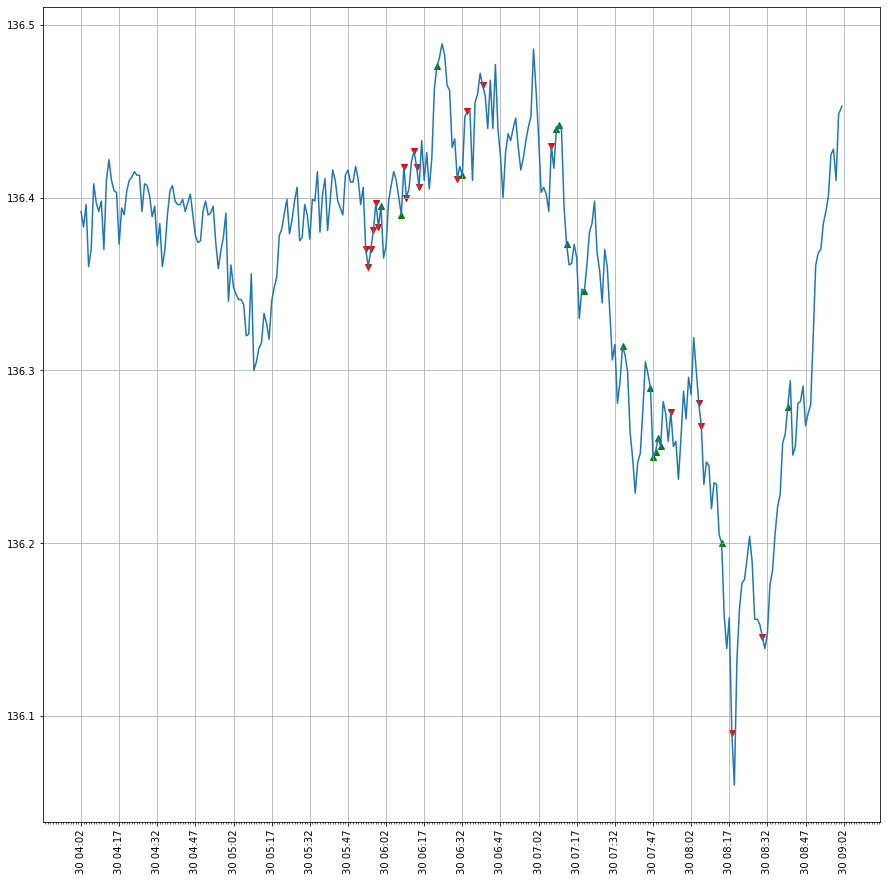

In [375]:
from matplotlib.dates import MinuteLocator, HourLocator, SecondLocator


fig, ax = plt.subplots(1, 1, figsize=(15,15))

ax.plot(results['Close'].index,results['Close'])
ax.scatter(results[(results['Indicator']==0) & (results['Strength']>0.0)].index,
            results[(results['Indicator']==0) & (results['Strength']>0.0)]['Price'],
            color='red', marker='v')
ax.scatter(results[(results['Indicator']==2) & (results['Strength']>0.0)].index,
            results[(results['Indicator']==2) & (results['Strength']>0.0)]['Price'],
            color='green', marker='^')
sloc = MinuteLocator()
mloc = MinuteLocator(interval=15)
ax.xaxis.set_major_locator(mloc)
ax.xaxis.set_minor_locator(sloc)

ax.grid(True)
plt.xticks(rotation=90)
plt.show()

In [376]:
import plotly.graph_objects as go

fig = go.Figure()

# Add traces
fig.add_trace(go.Candlestick(x=results.index,
                open=results['Open'],
                high=results['High'],
                low=results['Low'],
                close=results['Close']))
fig.add_trace(go.Scatter(x=results[results['Indicator']==0].index,
                         y=results[results['Indicator']==0]['Price'],
                    mode='markers',
                    name='Down',
                    marker=dict(
                        size=results[results['Indicator']==0]['Strength']*10
                    ),
                        marker_symbol='triangle-down'))
fig.add_trace(go.Scatter(x=results[results['Indicator']==2].index,
                         y=results[results['Indicator']==2]['Price'],
                    mode='markers',
                    name='Up',
                    marker=dict(
                        size=results[results['Indicator']==2]['Strength']*10
                    ),
                        marker_symbol='triangle-up'))



fig.show()